In [1]:
#UNEMPLOYMENT ANALYSIS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid")

In [4]:
file1 = r"D:\Oasis Infobyte Internship Tasks datasets\task 2\Unemployment in India.csv"
file2 = r"D:\Oasis Infobyte Internship Tasks datasets\task 2\Unemployment_Rate_upto_11_2020.csv"

In [5]:
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

In [6]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [7]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [8]:
df1.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [9]:
df2.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [10]:
df2.columns = df2.columns.str.strip().str.replace(" ", "_")

In [11]:
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True)

In [12]:
print(df2.columns.tolist())

['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate_(%)', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)', 'Region.1', 'longitude', 'latitude']


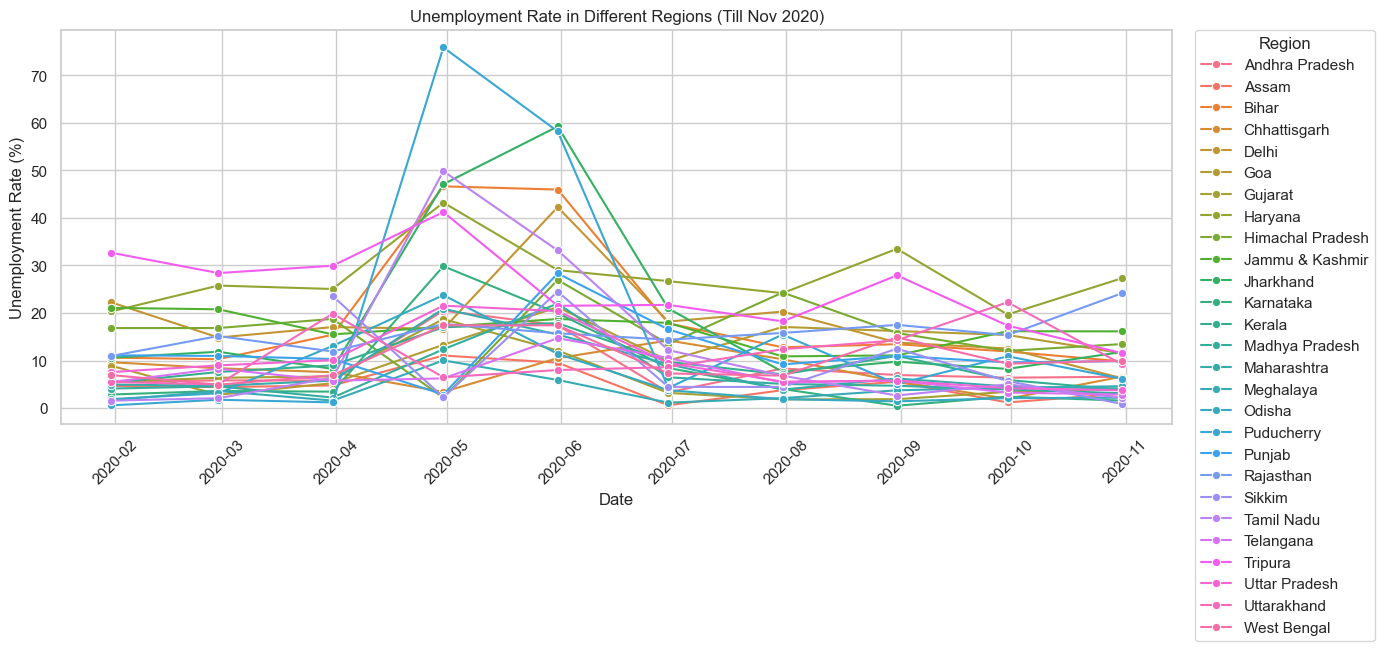

In [13]:
plt.figure(figsize=(14, 6))  # Wider figure
sns.lineplot(data=df2, x='Date', y='Estimated_Unemployment_Rate_(%)', hue='Region', marker="o")
plt.title('Unemployment Rate in Different Regions (Till Nov 2020)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

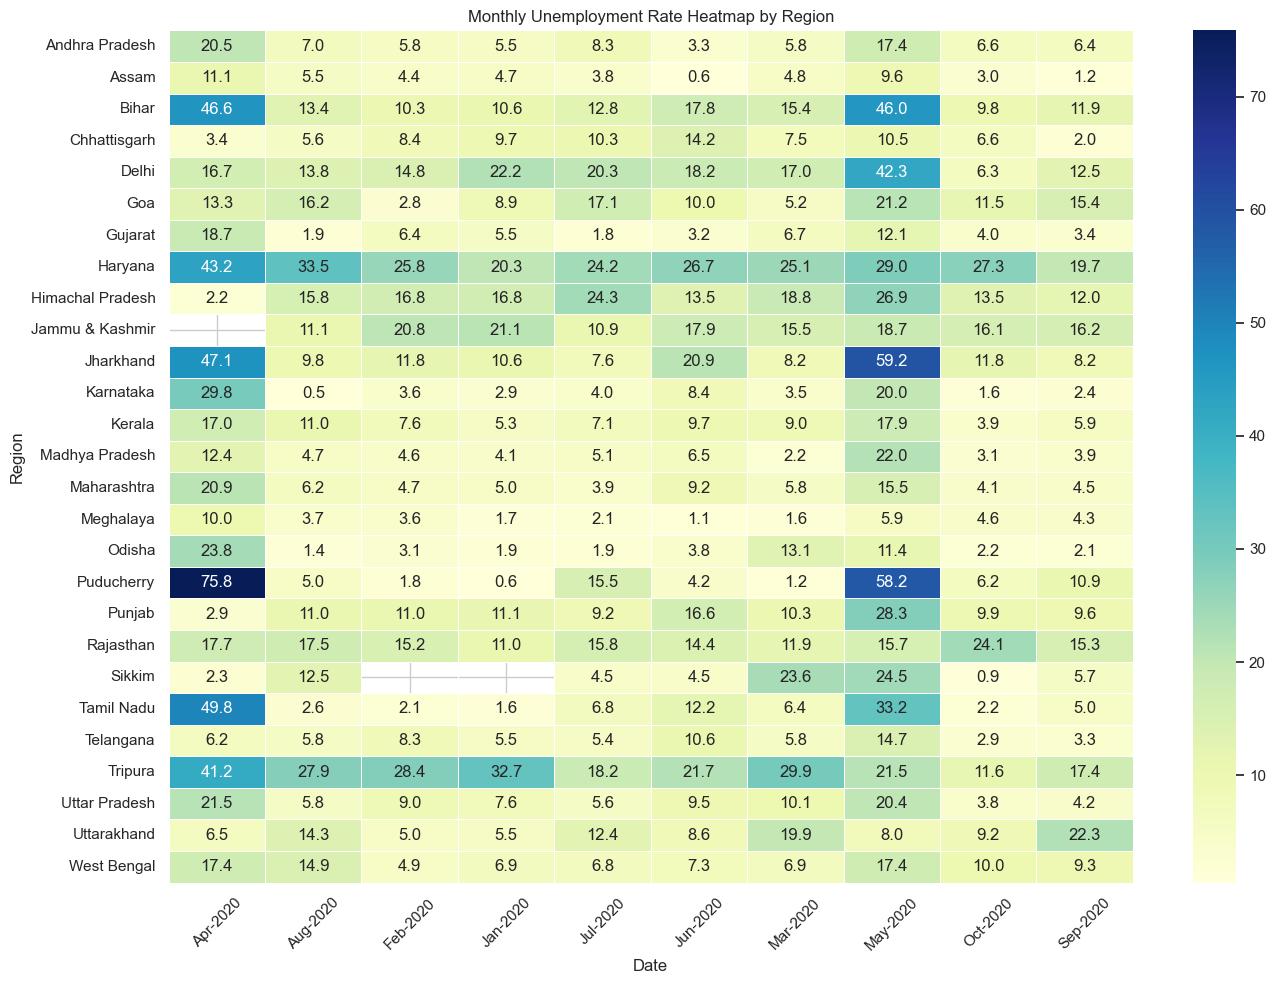

In [14]:
pivot_table = df2.pivot_table(values='Estimated_Unemployment_Rate_(%)', index='Region', columns=df2['Date'].dt.strftime('%b-%Y'), aggfunc='mean')
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title('Monthly Unemployment Rate Heatmap by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
region_avg = df2.groupby("Region")["Estimated_Unemployment_Rate_(%)"].mean().sort_values()

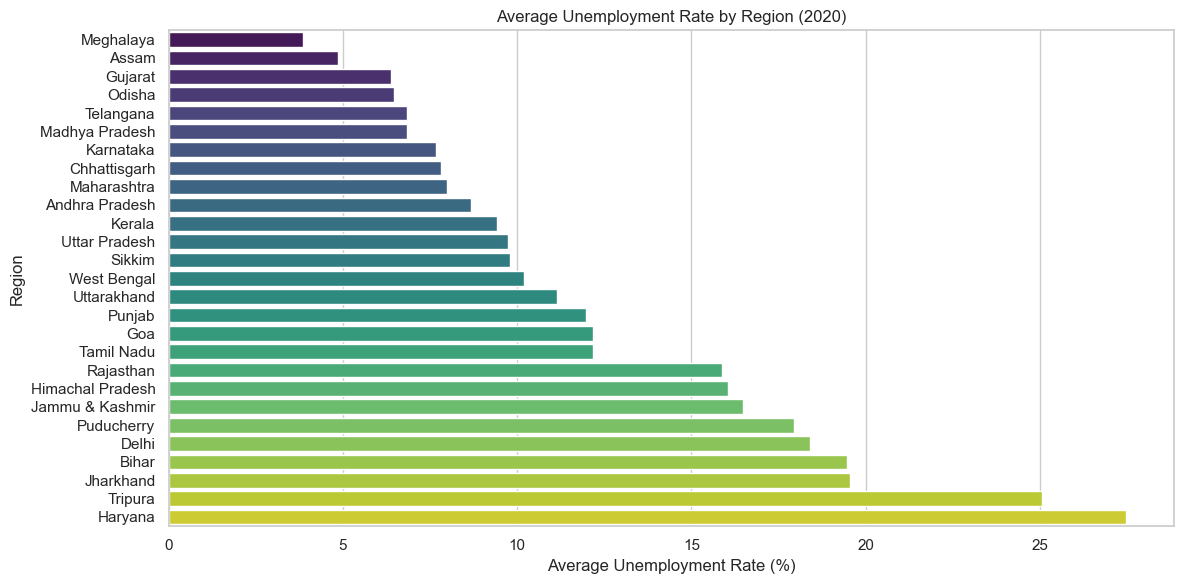

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x=region_avg.values, y=region_avg.index, hue=region_avg.index, palette="viridis", dodge=False, legend=False)
plt.title("Average Unemployment Rate by Region (2020)")
plt.xlabel("Average Unemployment Rate (%)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

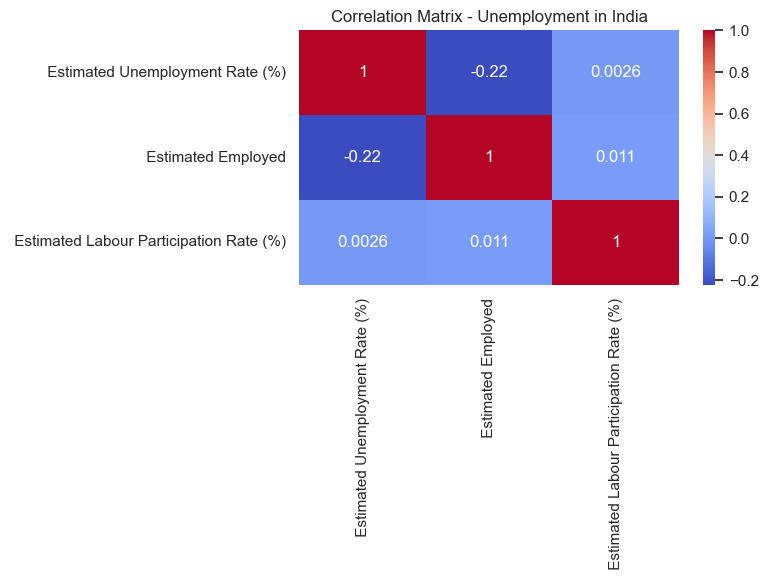

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Unemployment in India')
plt.tight_layout()
plt.show()